In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors

In [40]:
np.random.seed(0)
X = 5 * np.random.rand(40, 2)
T = 5 * np.random.rand(4000, 2)
y = np.abs(np.sin(np.mean(X, axis=1)).ravel())

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))
y = np.abs(y)

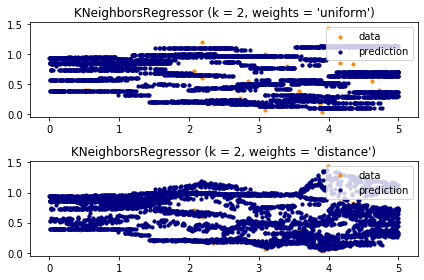

In [41]:
# Fit regression model
n_neighbors = 2

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X[:,1], y, color='darkorange', label='data', s = 10)
    plt.scatter(T[:,1], y_, color='navy', label='prediction', s = 10)
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

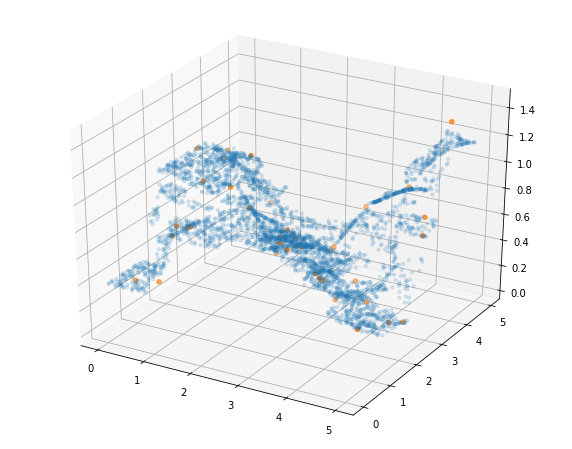

In [48]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, projection='3d')  
surf2 = ax1.scatter(T[:,0], T[:,1], y_, alpha = 0.15, s = 10)
surf = ax1.scatter(X[:,0], X[:,1], y)
plt.show()